In [211]:
%load_ext autoreload
%autoreload 2

import keras
from models import TestModels
import data
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [212]:
dataset = data.DataSet()
x,y,yseq = dataset.all_data_from_npz('train')

In [ ]:
# m = TestModels(5, 'conv_lstm')
c_weights = {0:10, 1:10, 2:10, 3:10, 4:1}
gen = data.DataGenerator('train', batch_size=1, useSequences=True, class_weights=c_weights)
# c_weights = {0:10, 1:10, 2:10, 3:10, 4:1}
m.model.fit_generator(gen, epochs=1)

Epoch 1/1
 5/27 [====>.........................] - ETA: 6:06 - loss: 2.7318 - acc: 0.9500

In [307]:
m.model.save('conv-lstm3264-10ep-test.hdf5')

In [284]:
x,y,yseq = dataset.all_data_from_npz('train')

In [329]:
n = 12
x1 = np.array([x[n]])
# x1 = dense_m.predict(x1)
y1 = np.array([yseq[n]])

In [330]:
preds = m.model.predict(np.array([x[n]])).squeeze()
predSeq = [dataset.classes[p.argmax()] for p in preds]
predMax = [p.max() for p in preds]
actualSeq = [dataset.reverse_one_hot(k) for k in y1.squeeze()]
df = pd.DataFrame({'actual': actualSeq, 'predicted': predSeq, 'predVal': predMax})
df

,actual,predicted,predVal
0,black,black,0.220505
1,black,black,0.239744
2,black,black,0.257433
3,black,black,0.273241
4,black,black,0.286981
5,black,black,0.298590
6,black,black,0.308104
7,black,black,0.315630
8,black,black,0.321320
9,black,black,0.325361


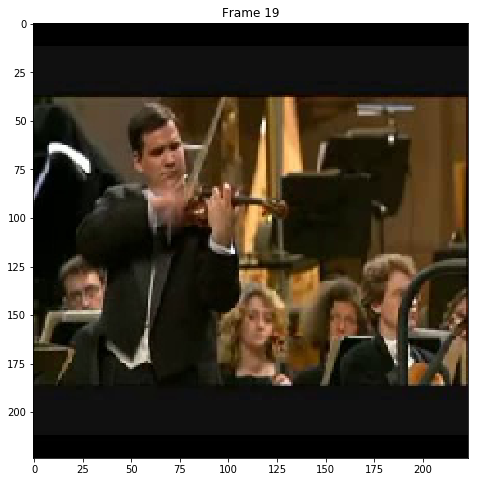

In [322]:
%matplotlib inline
import utils
utils.displayImageLoop(x[n])

In [51]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

y_integers = np.argmax(y, axis=1)
class_weights = compute_class_weight('balanced', np.unique(y_integers), y_integers)
d_class_weights = dict(enumerate(class_weights))

In [52]:
d_class_weights

{0: 0.54, 1: 1.08, 2: 1.8, 3: 1.35, 4: 1.08}

In [55]:
def generate_sample_weights(training_data, class_weight_dictionary): 
    sample_weights = [class_weight_dictionary[np.where(one_hot_row==1)[0][0]] for one_hot_row in training_data]
    return np.asarray(sample_weights)

In [57]:
s_weights = generate_sample_weights(y, c_weights)